# Proyecto de clustering de segmentación de países por datos socio-económicos



## Importación librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

Este data set tiene capíses y variables como: ingresos, mortalidad infantil, etc. 

## Carga de datos

In [2]:
df_country = pd.read_csv('../Country-data.csv')

Observamos métricas de las variables numéricas. 

In [3]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Manejando valores nulos

In [4]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

no existen nulos en el dataset.

## Validando duplicados

No existen valores duplicados en el dataset.

In [5]:
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Análisis de distribución

Es de importancia deterctar outliers, por lo que analizamos la distribución de los datos. 

Iteramos sobre todas las columnas que no sean del tipo object (porque queremos analizar solamente las variables numéricas).

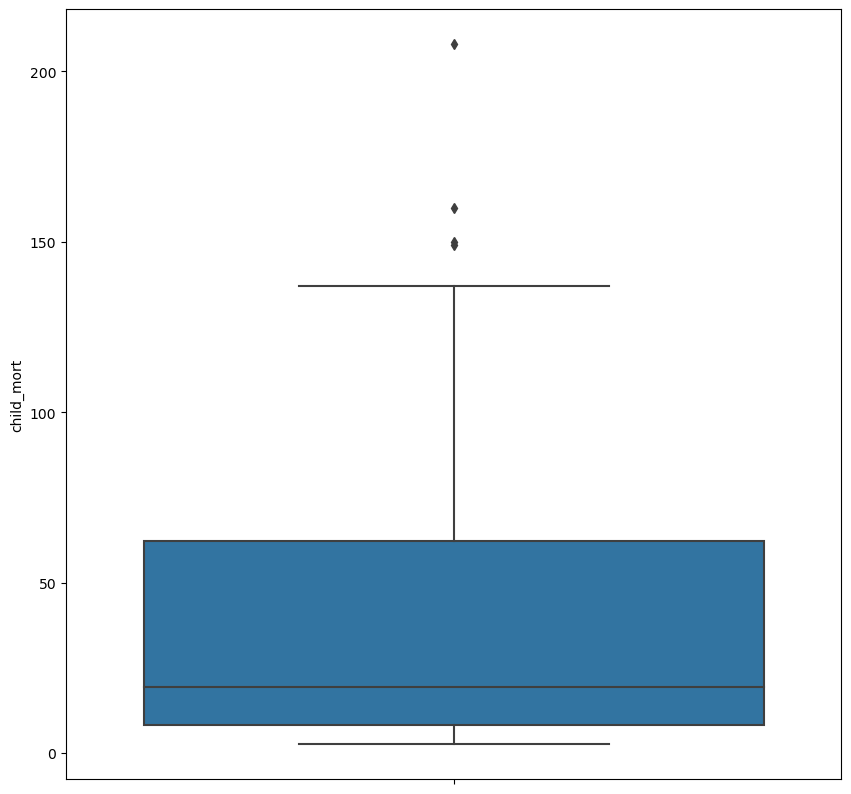

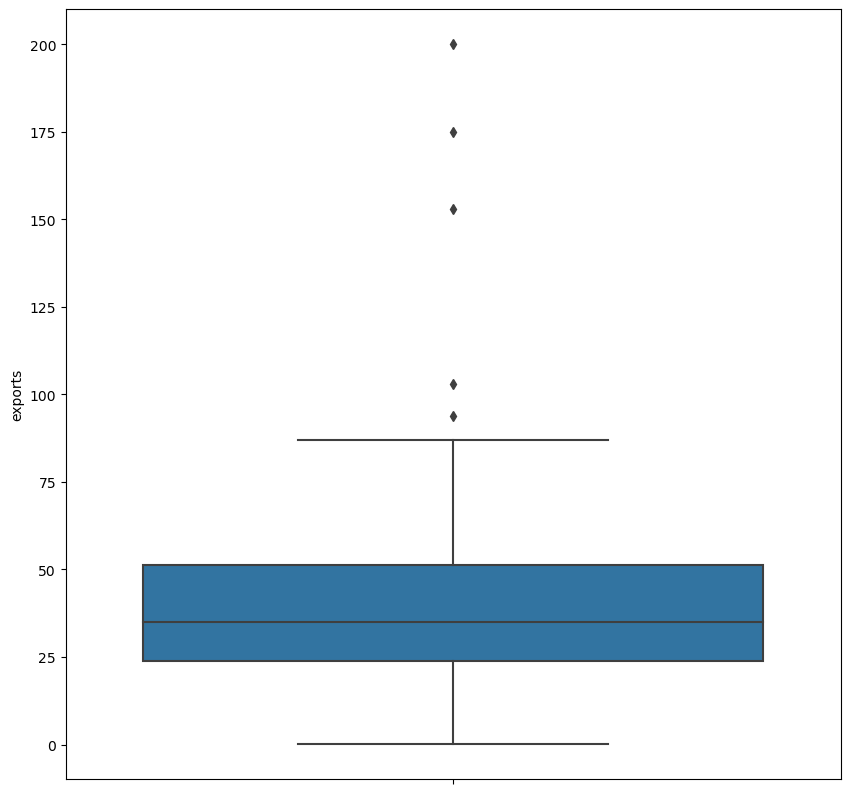

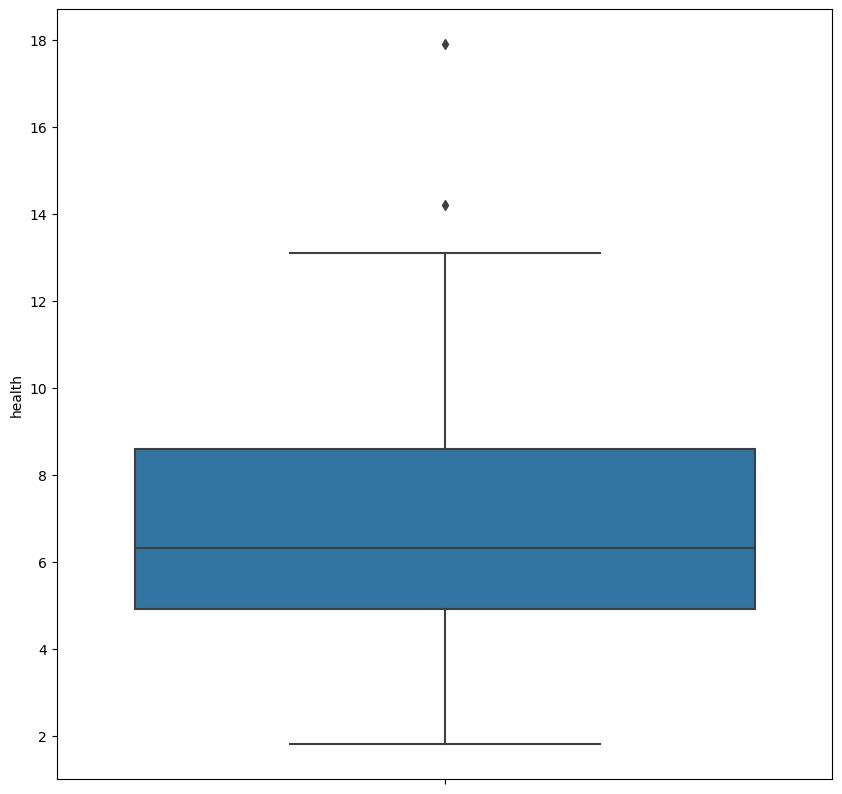

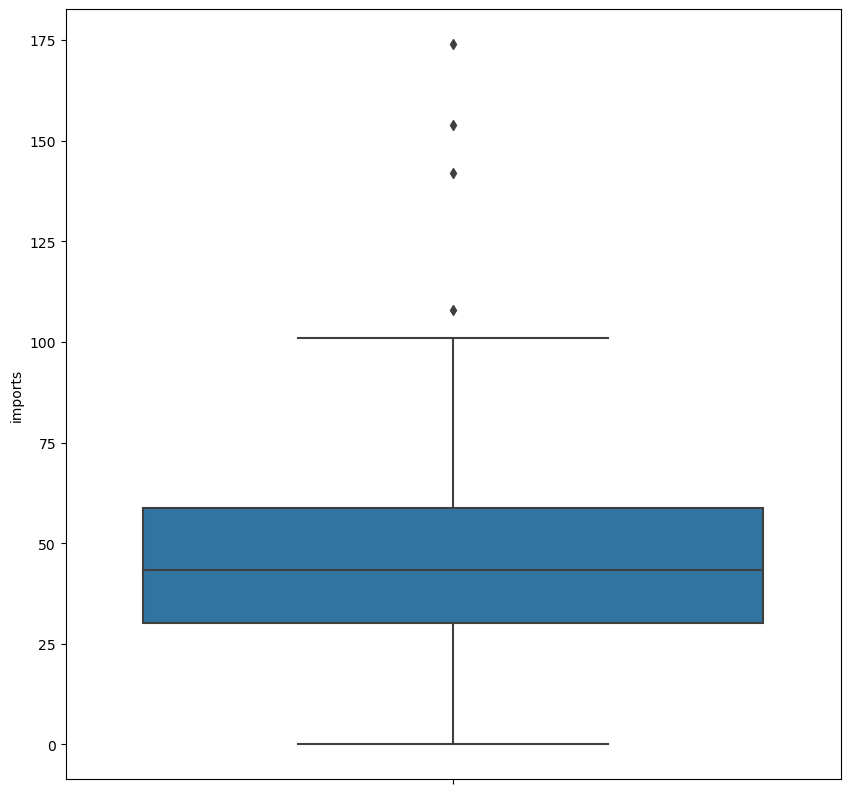

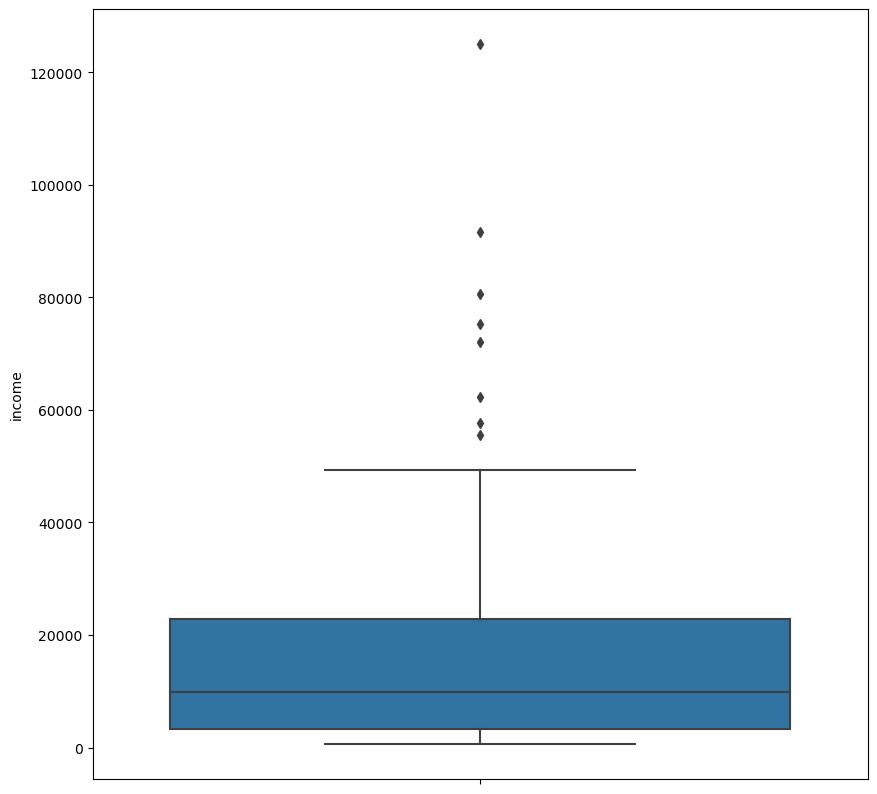

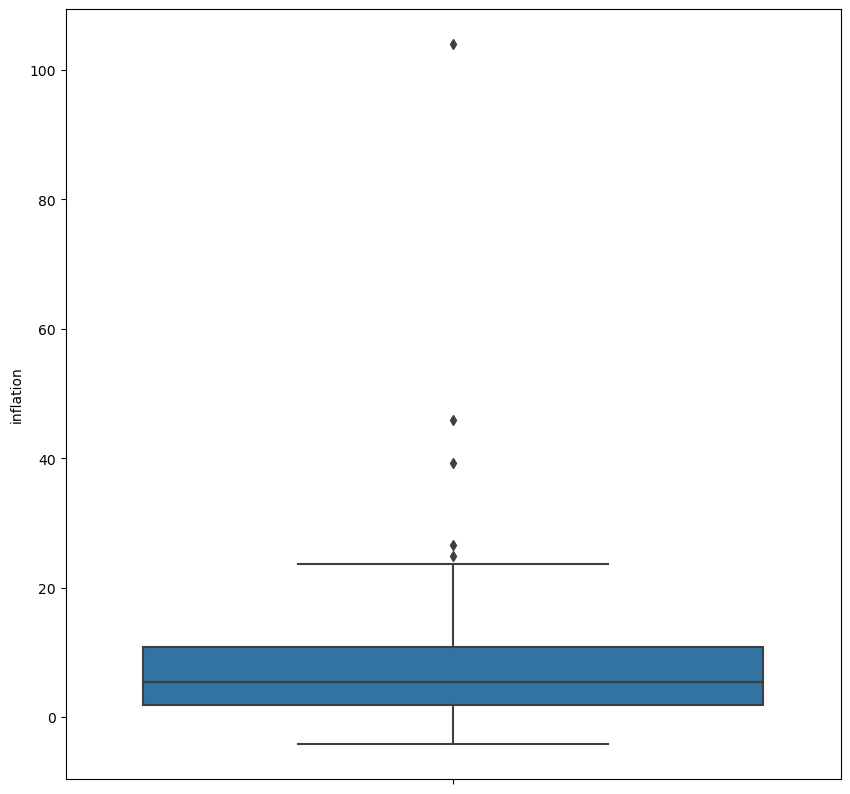

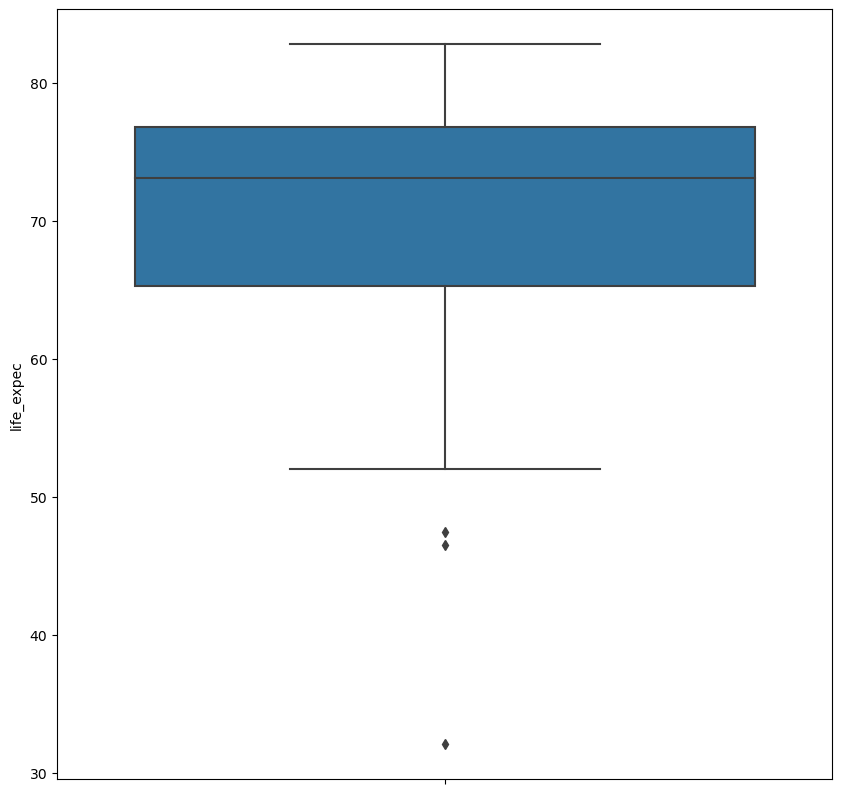

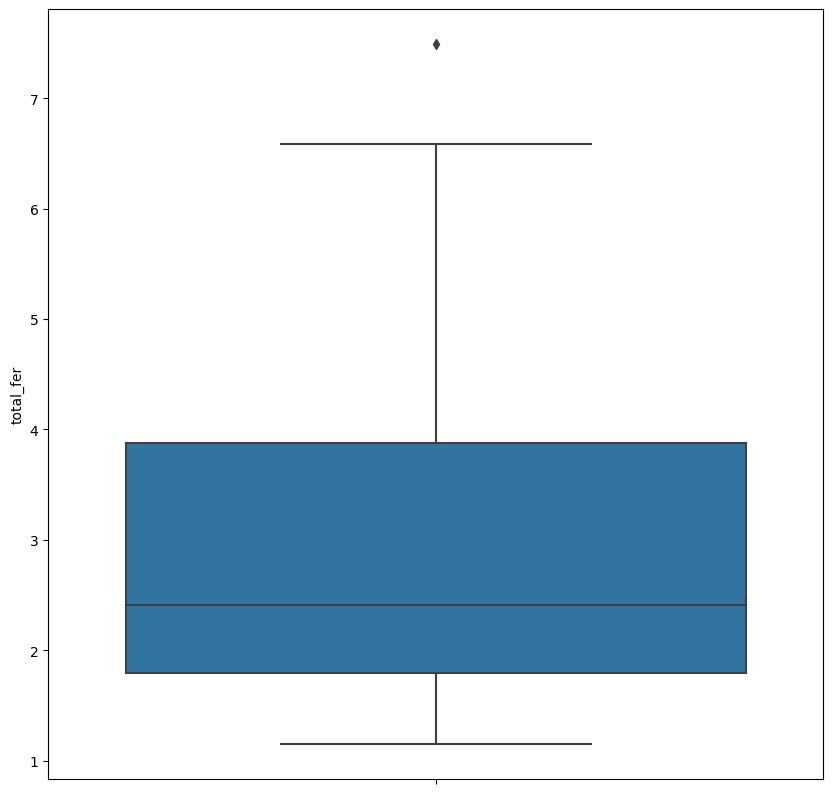

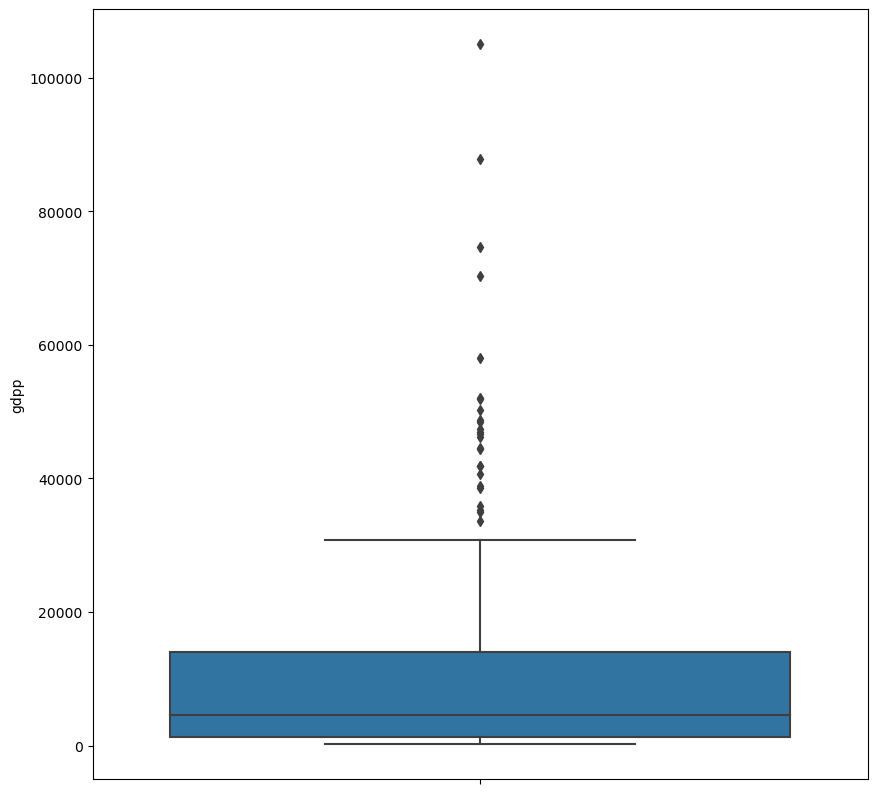

In [6]:
int_cols = df_country.select_dtypes(exclude='object').columns 
#Aquí hacemos un loop para que grafique cada una de las variables: 
for _ in int_cols:
    plt.figure(figsize=(10,10))
    #Y es igual a lo que estemos iterando:
    sns.boxplot(data=df_country, y= _)
    plt.show()

Otro análisis de distribución para ver la correlación entre las variables: 

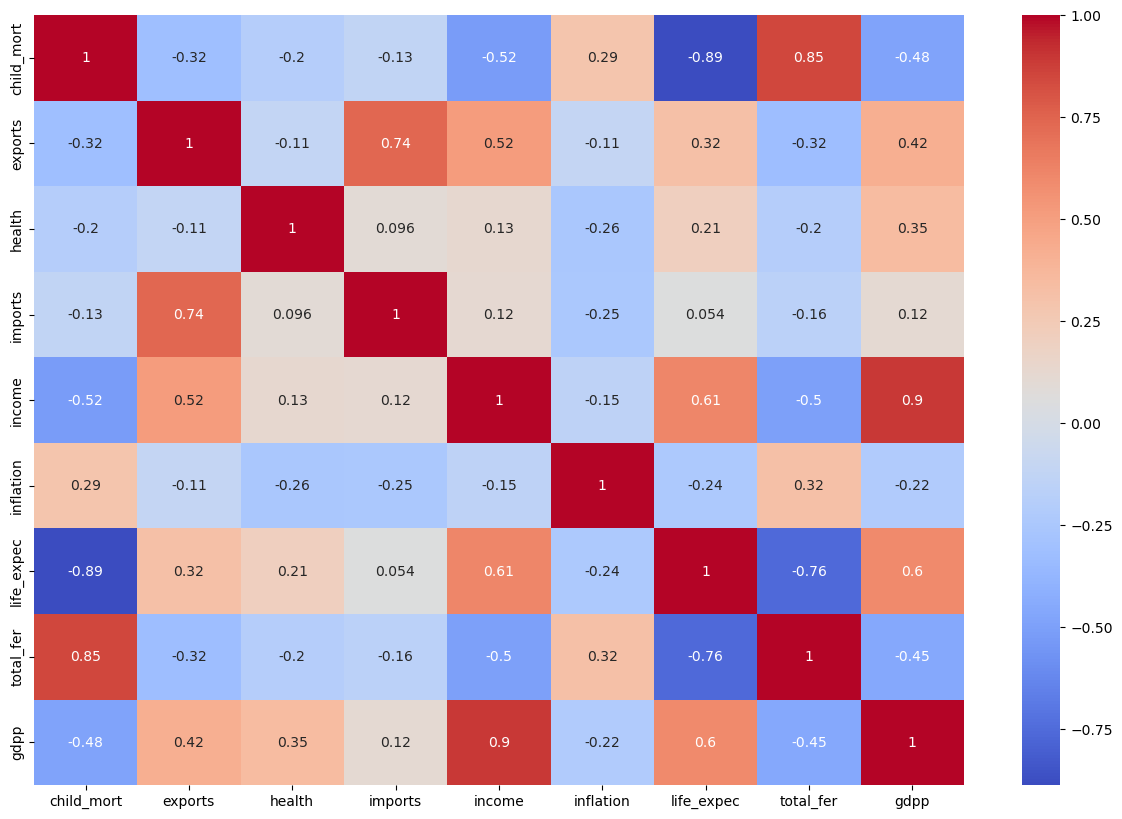

In [7]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_country.corr(), annot=True, cmap='coolwarm')
plt.show()

Hay algunas correlaciones bastante altas. Todas las variables son importantes: decidimos por no descartar ninguna más allá de que existe alto grado de correlación entre algunas de ellas.

## Escalar datos

Sirve para estandarizar la distancias en la medición de los datos. 

Importamos el standardScaler. 

En el df final eliminamos el nombre del país, es una variable que no nos sirve por el momento. 

In [8]:
from sklearn.preprocessing import StandardScaler
scaaler = StandardScaler()
df_country_scaled = scaaler.fit_transform(df_country.drop('country',axis=1))

Crea un df a partir del array df_country_scaled. Aplica las columnas del df original sin la variable country: Tenemos entonces un dataset escalado con todas las variables numéricas que necesitamos. 

In [9]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns = df_country.drop('country',axis=1).columns )

In [10]:
df_country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## PCA

Importamos la librería del pca

In [11]:
from sklearn.decomposition import PCA 

Crea una variable que contiene el algoritmo. 

Entrena el algoritmo con el df de países escalados. 

Crea una nueva variable pca con datos escalados y aplica una transformación incorporando el df_country_scaled

Crea entonces un nuevo df llamado pca_data_scaled, ahora queda decidir la reducción de dimensionalidad para eliminar variables sin perder información de importancia. 

In [12]:
pca = PCA()
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

Para eliminar variables inncecesarias, calcula el índice de variaza de la siguiente manera. Crea la variable var (varianza) y lo iguala con el ratio de varianza. 

In [13]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


En el siguiente gráfico: el acumulado de la varianza es igual a la función cumsum, donde aplica un redondeo de la variable que estamos manejando: varianza con cuatro decimales. Esto lo multiplicamos por 100 para sacar el porcentaje. 

Luego graficamos. 

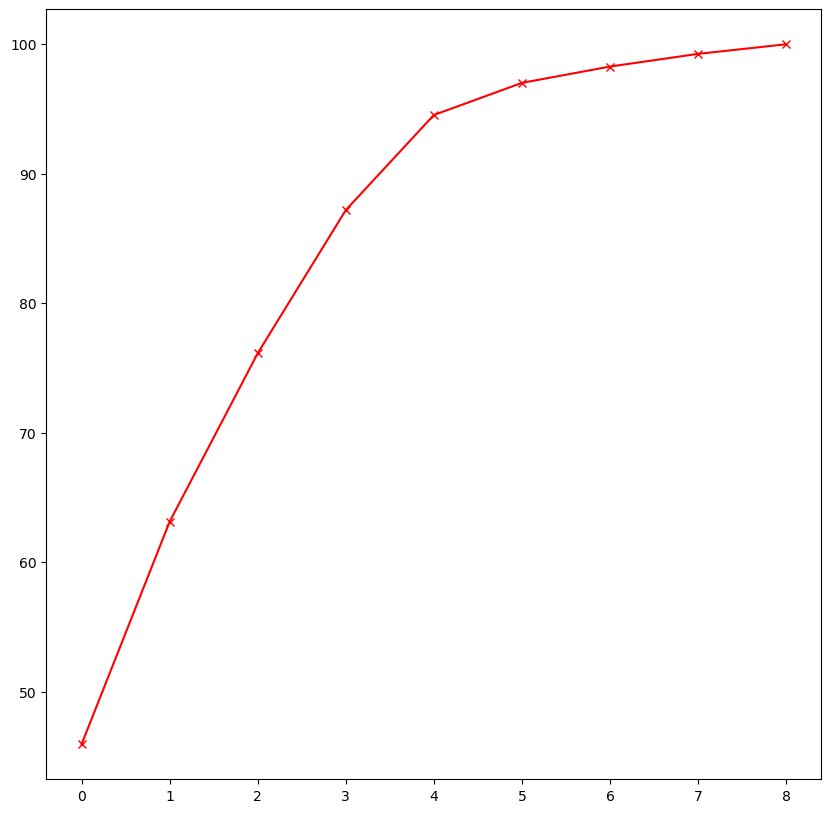

In [14]:
cum_var = np.cumsum(np.round(var, decimals=4)*100) 
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

El gráfico indica los componentes principales con X. Qué indica el gráfico?: cuando en el eje "y" tenemos 4 componentes principales, tenemos el 90% (eje x) de nuestras variables. Si el objetivo es reducir la dimensionalidad, con 4 componentes principales tenemos un buen porcentaje de variables. 

Crea una variable pca_data_standart para crear un nuevo data frame. 

A ese nuevo df le quita las columnas que no necesitamos: sólo queremos la columna 0, 1, 2 y 3, borramos por tanto la 4, 5, 6, 7 y 8. 

In [15]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8],axis=1, inplace=True)

nos queda un df reducido con 4 componentes principales que centran gran parte de la varianza. EStamos perdiendo algo de información, pero para el clustering es mejor tener poca dimensionalidad para calcular la distancia entre los clustering. 

In [16]:
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


## Importar librerías para clustering

In [17]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## K-means

Usamos un Kmeans sobre el df del PCA que creamos anteriormente. 

### PCA

Creamos una suma de la distancia cuadrada de los datapoints porque no sabemos K, y tenemos que iterar sobre distintos k para averiguarlo. 

Crea otra variable para el índice de la silueta, los valores de la iteración se acumularían aquí. 

Selecciona un rango de 2 a 15 en la iteración. 

Crea una variable para kmeans (km) y define el número de clusters como _, valor que se llena en cada iteración. 

Y es una variable que contiene las predicciones sobre el dataset que tiene el pdc. 

Luego, a la suma de la distancia al cuadrado le aplica el append de km.inertia para obtener la gráfica del codo. 

Finalmente, al valor de la silueta le aplica un append con todos los valores de pca data standard y la predicción "y".

Entonces: con la iteración crea dos listas, una de suma de la distancia al cuadrado y la otra es el score de silueta para hacer la gráfica del codo y una gráfica del índice de silueta. 


In [18]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15) 
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,y))

graficamos primero la suma de la distancias cuadráticas. Vemos entonces la gráfica del codo. 

A primera vista, el codo se encuentra entre 4 y 5. 

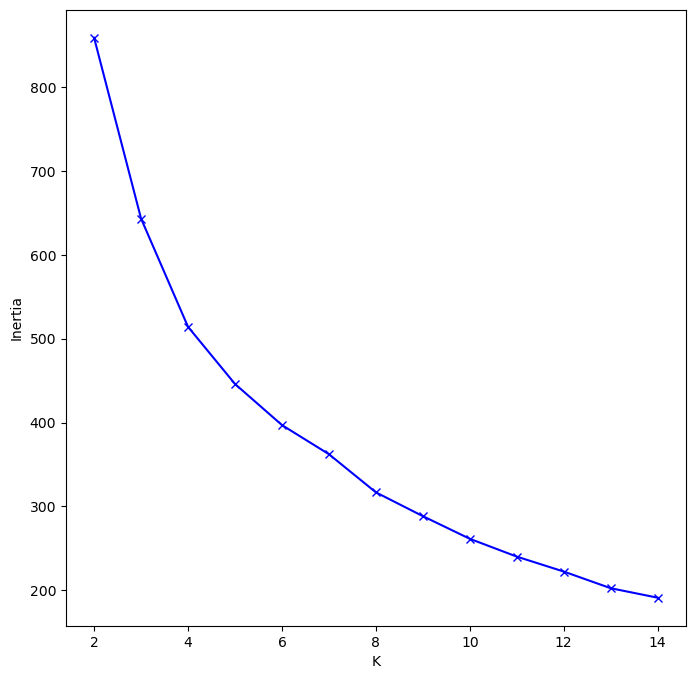

In [19]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

Hacemos el gráfico del coeficiente de silueta para confirmar que el codo verdaderamente esté entre 4 y 5. 

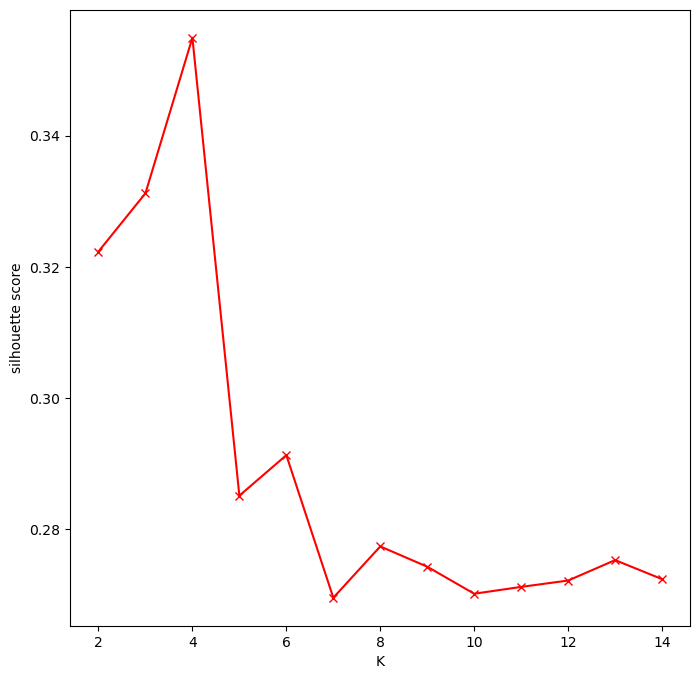

In [20]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

Vemos que en 4 está el punto máximo, tendríamos que entrenar el código con ese valor. 

Hacemos el código con 4 clusters y hacemos un print del índice de silueta con este valor utilizando el pca data standar y las predicciones en y. 

Agregamos a nuestro df original df_country una nueva columna que se llama kmeanspca, que es igual a las predicciones que realizamos. La predicción corresponde al valor del índice de silueta. 

In [21]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df_country['k_means_pca'] = y

0.3522170843293593


Ahora hacemos lo mismo, pero sin pca y sin reducción de dimensionalidad: 

### Sin PCA

In [22]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15) 
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_country_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scaled,y))

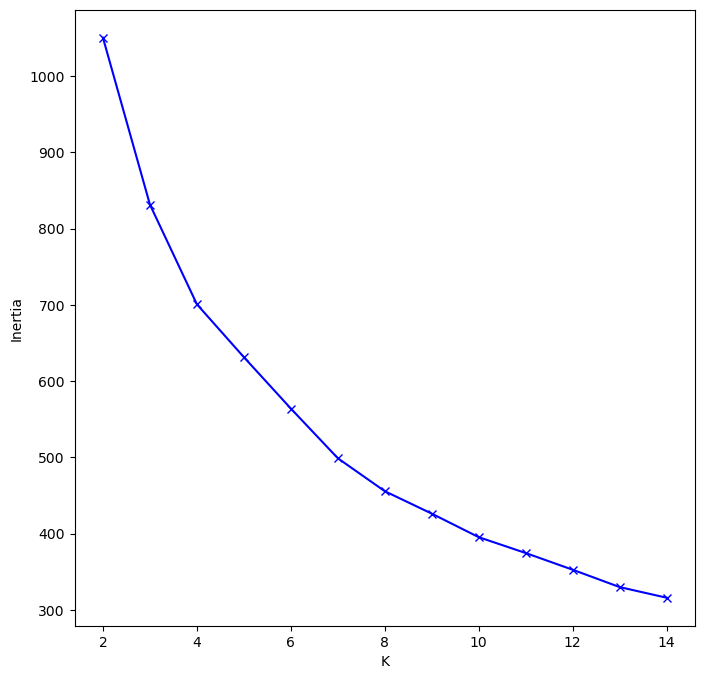

In [23]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

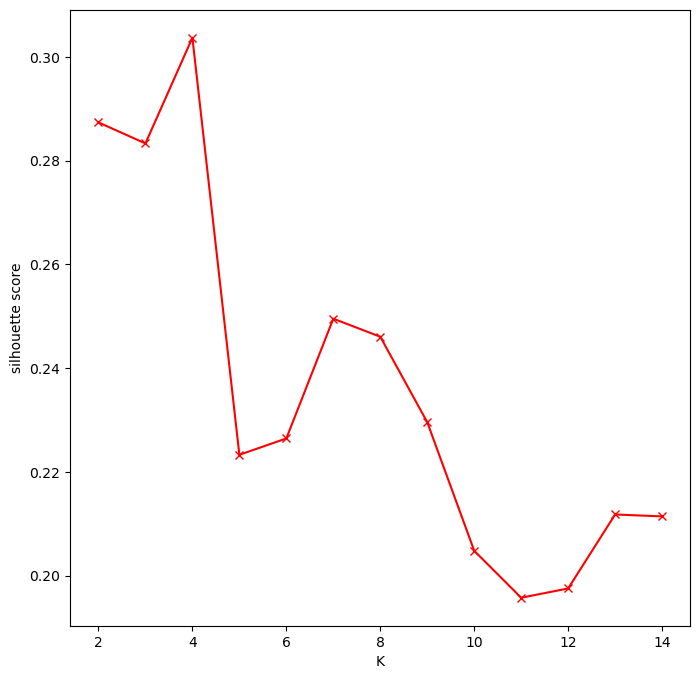

In [24]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [25]:
km = KMeans(n_clusters = 5)
y = km.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y))
df_country['k_means'] = y

0.22237180677008042


Conclusión. Trabajando sin pca y sin reducción de la dimensionalidad los valores para el cluster no son precisos: el valor de 5 tiene mejor coeficiente, no 4. El valor de la silueta da un resultado de 0.22, un valor menor al 0,35 que tuvimos con la reducción de la dimensionalidad. Por tanto: el PCA sí sirve para mejorar los resultados. 

## Agglomerativen hierarchical clustering

### PCA

Lo primero es ejecutar el dendrograma:

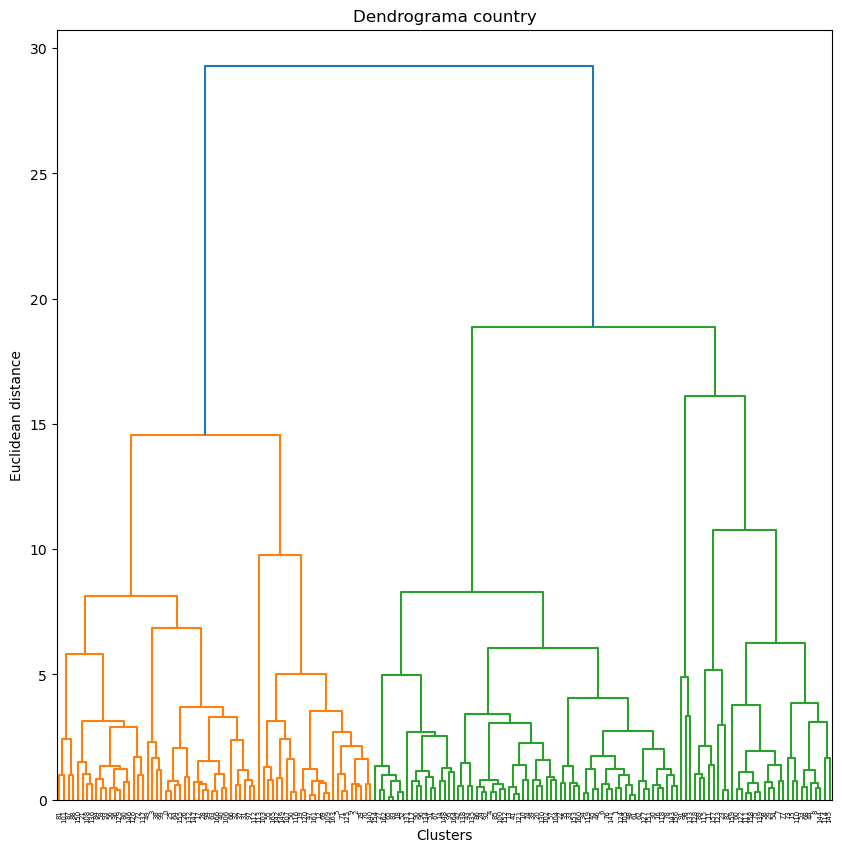

In [26]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()



Probamos a continuación con el valor de 2 para evaluar resultados. 

In [30]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_hc ))
#agregamos la columna hc_pca al df country
df_country['hc_pca'] = y_hc

0.3070110704080525


nos da un 0.30, un resultado un poco flojo. 

### Sin PCA

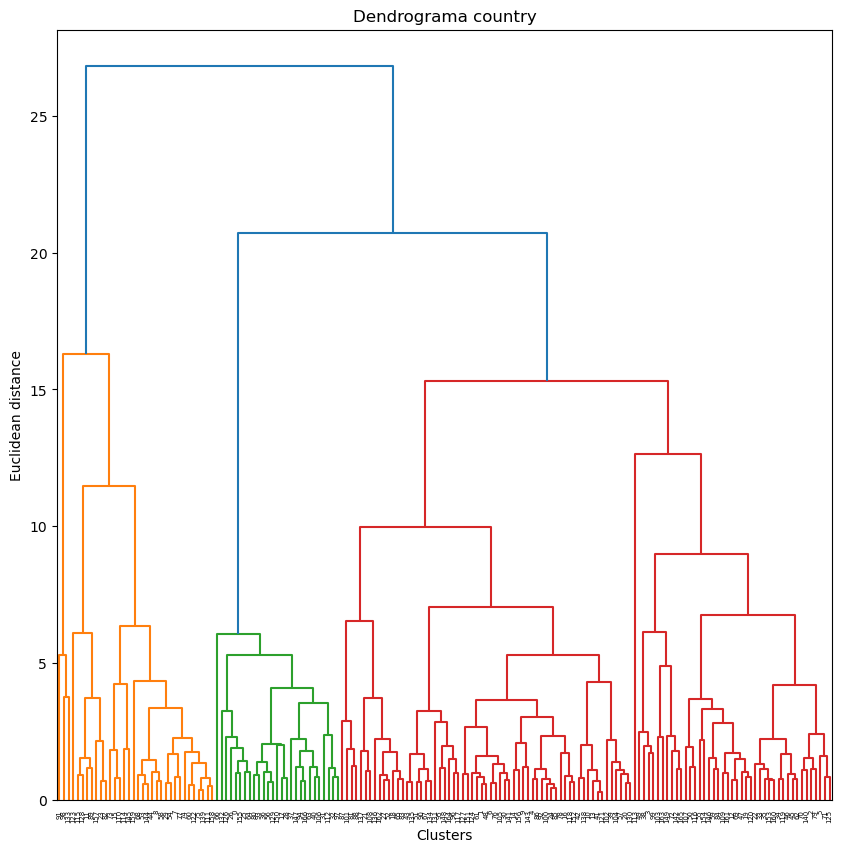

In [31]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_country_scaled, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [32]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_hc ))
df_country['hc'] = y_hc

0.3153134331018189


Aquí el resultado es mejor!

## DBSCAN

### PCA

Primero Calculamos epsilon y el número de puntos:

Hacemos los cálculos con el vecino más cercano, por eso ponemos el valor de 2. Guardamos el resultado en la variable neighbors. 

Hacemos un fit de neighbors con el pca data standard. 

Esos vlores se guardan como distancia e índices. Sacamos entonces la distancia al vecino más cercano y el índice que le corresponde. 

In [33]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

Hacemos a continuación un gráfico de las distancias. 

Con [:,1] indicamos que queremos sólo la distancia del vecino más cercano. 

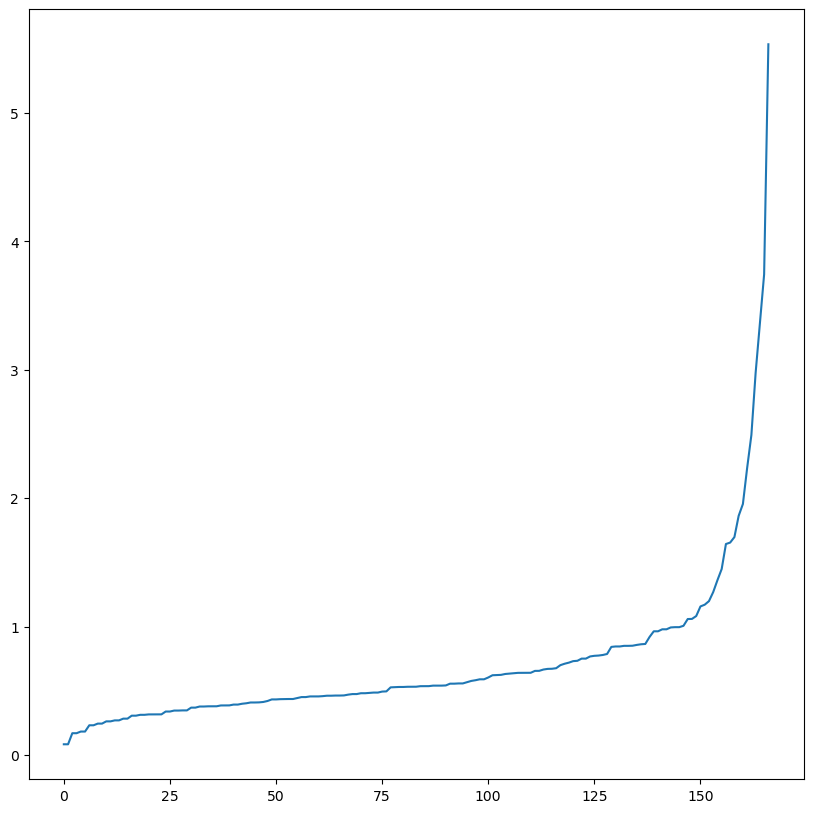

In [34]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

vemos que la rodilla itera entre 0,5 y 2.

Creamos entonces nuestro set de datos. utilizando valores entre 0,5 y 2 con una iteración de a valores de 0,10.

Para el minimo de samples le decimos que vaya entre 3 a 12. 

In [35]:
eps_values = np.arange(0.5, 2.0, 0.10)
min_samples = np.arange(3,12)

Iteramos a continuación sobre la combinatoria de lo que definimos antes: 

In [36]:
from itertools import product 
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score(pca_data_standard,y_dbscan))
    except:
        sil_score.append(0)    
    no_of_clusters.append(len(np.unique(y_dbscan)))


nota: el except es por si hay algún fallo. 

Ahora vemos los pivots para ver la matriz y evaluar: 

In [37]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

hacemos los pivots: 

In [38]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

graficamos: 

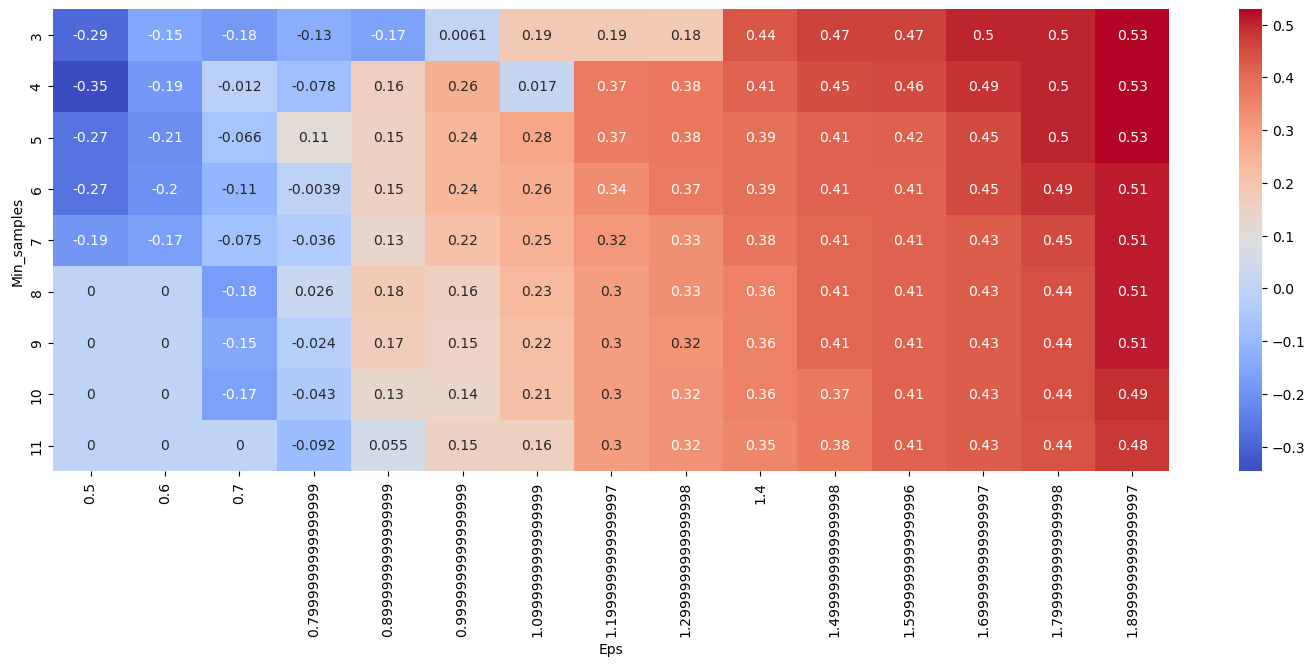

In [39]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

Entonces, tenemos índice de silueta alto cuando tenemos un epsilon de 1,8 (ejex) y un mín samples de 3, 4 o 5.

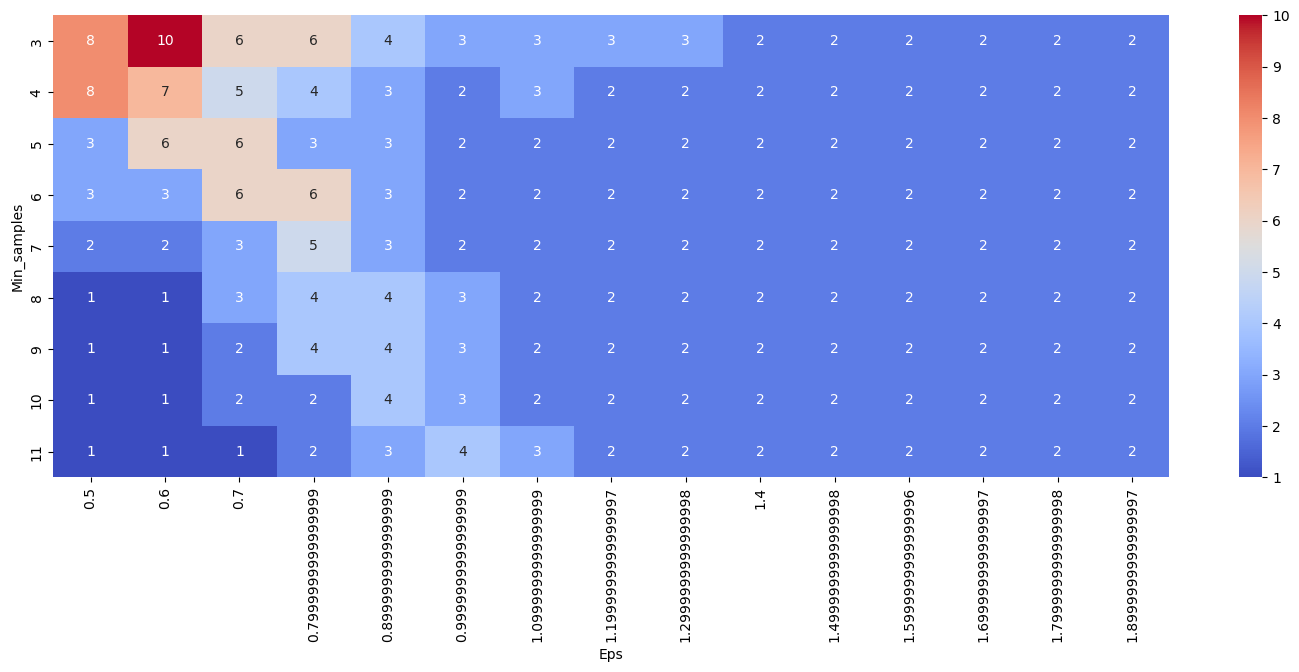

In [40]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

hacemos lo mismo pero con el pivot 2. 

In [41]:
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_dbscan ))
df_country['dbscan_pca'] = y_dbscan

0.18591175730784337


Utilizamos un número de clusters de 3, con un epsilon de 1,2. 0.19 no es una muy buena predicción, por lo que ahora vamos a ver cómo funciona sin el pca. 

### Sin PCA

remplicamos el código anterior, pero utilizamos el df country scaled. 

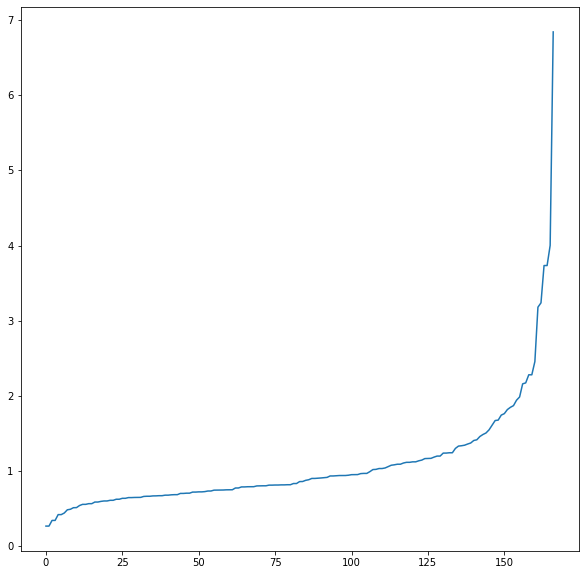

In [ ]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_scaled)
distances, indices = neighbors_fit.kneighbors(df_country_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

vemos que de 1 a 3 es el rango en donde vamos a buscar epsilon.

In [42]:
eps_values = np.arange(1, 3.0, 0.10)
min_samples = np.arange(3,12)

In [43]:
from itertools import product 
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scaled)
    try:
        sil_score.append(silhouette_score(df_country_scaled,y_dbscan))
    except:
        sil_score.append(0)    
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [44]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [45]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

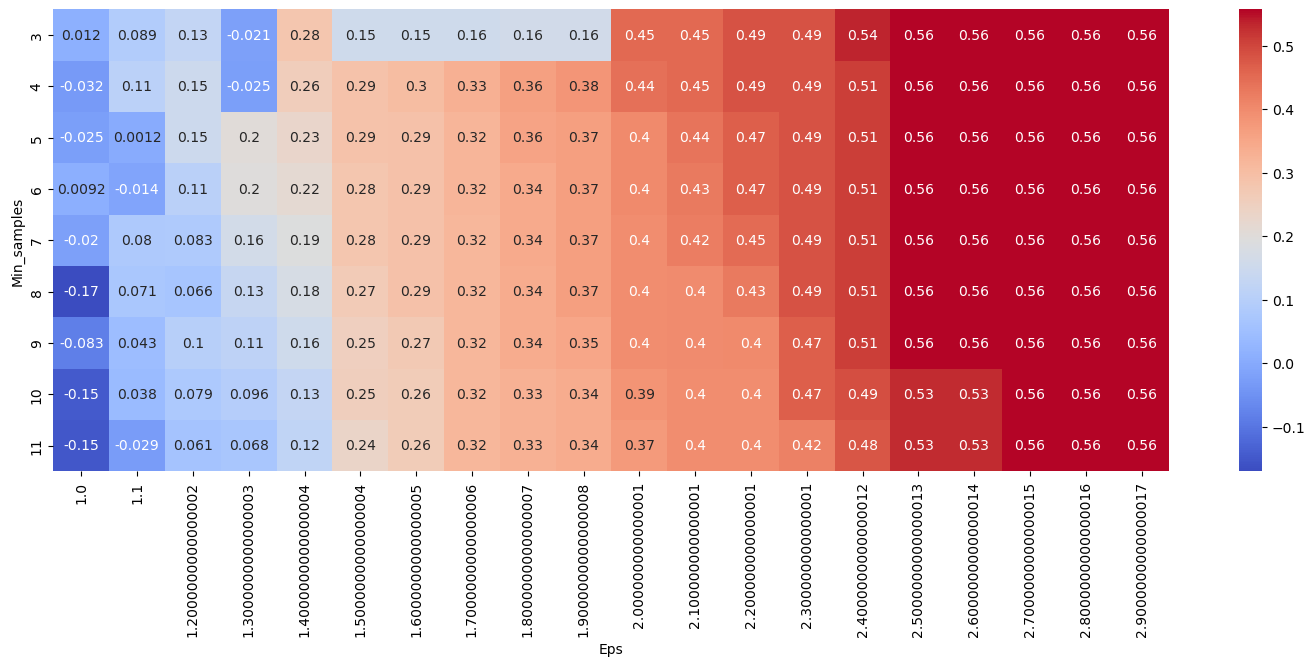

In [46]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

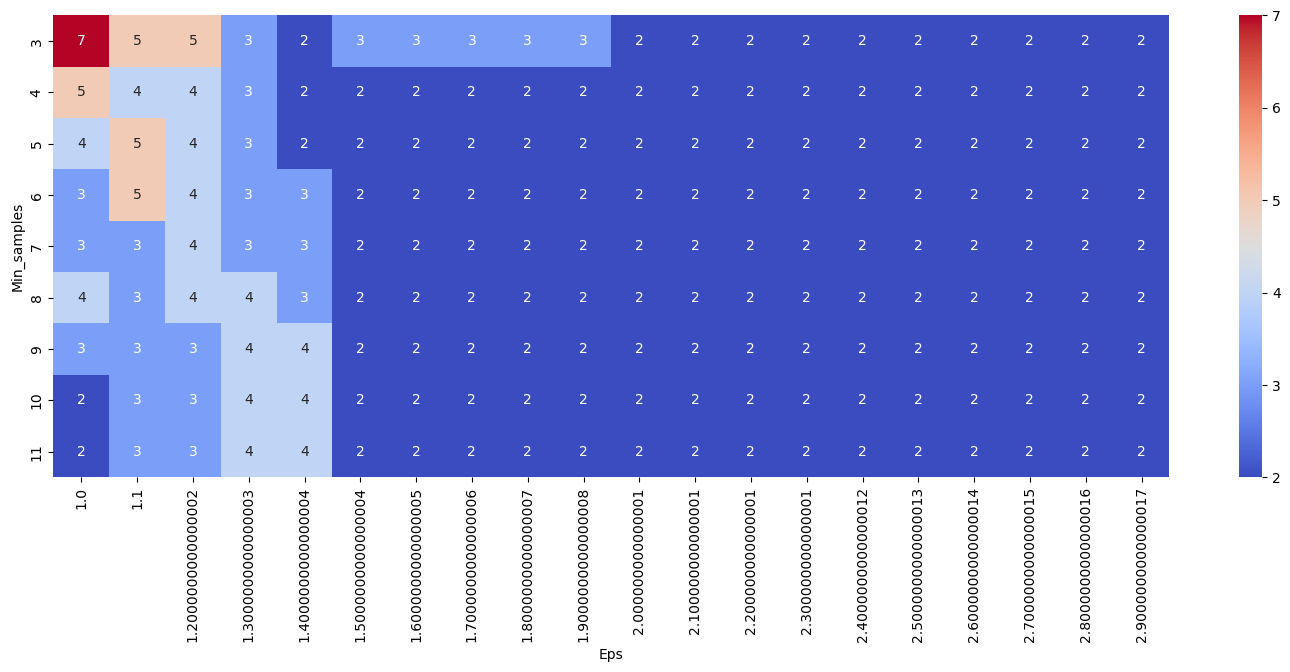

In [47]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [48]:
dbscan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_dbscan ))
df_country['dbscan_cluster'] = y_dbscan

0.1563549566374231


el resultado es inclusive peor que trabajando con el PCA. 

In [49]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3,4,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,3,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3,4,1,0,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,3,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,3,0,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,3,4,1,0,0,0


Los mejores resultados estuvieron en el Kmean con PCA, por tanto es el algoritmo que vamos a evaluar. 

## Evaluación de resultados

In [ ]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',
       'k_means', 'hc_pca', 'hc', 'dbscan_pca', 'dbscan_cluster'],
      dtype='object')

Seleccionamos del df las variables numéricas que nos interesan descartando las categóricas. Luego hacemos un gráfico separando con el hue en función de la variable kmeans pca:

In [50]:
df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,3


observamos que sí hay una diferenciación en los gráficos respecto al número de clusters. 

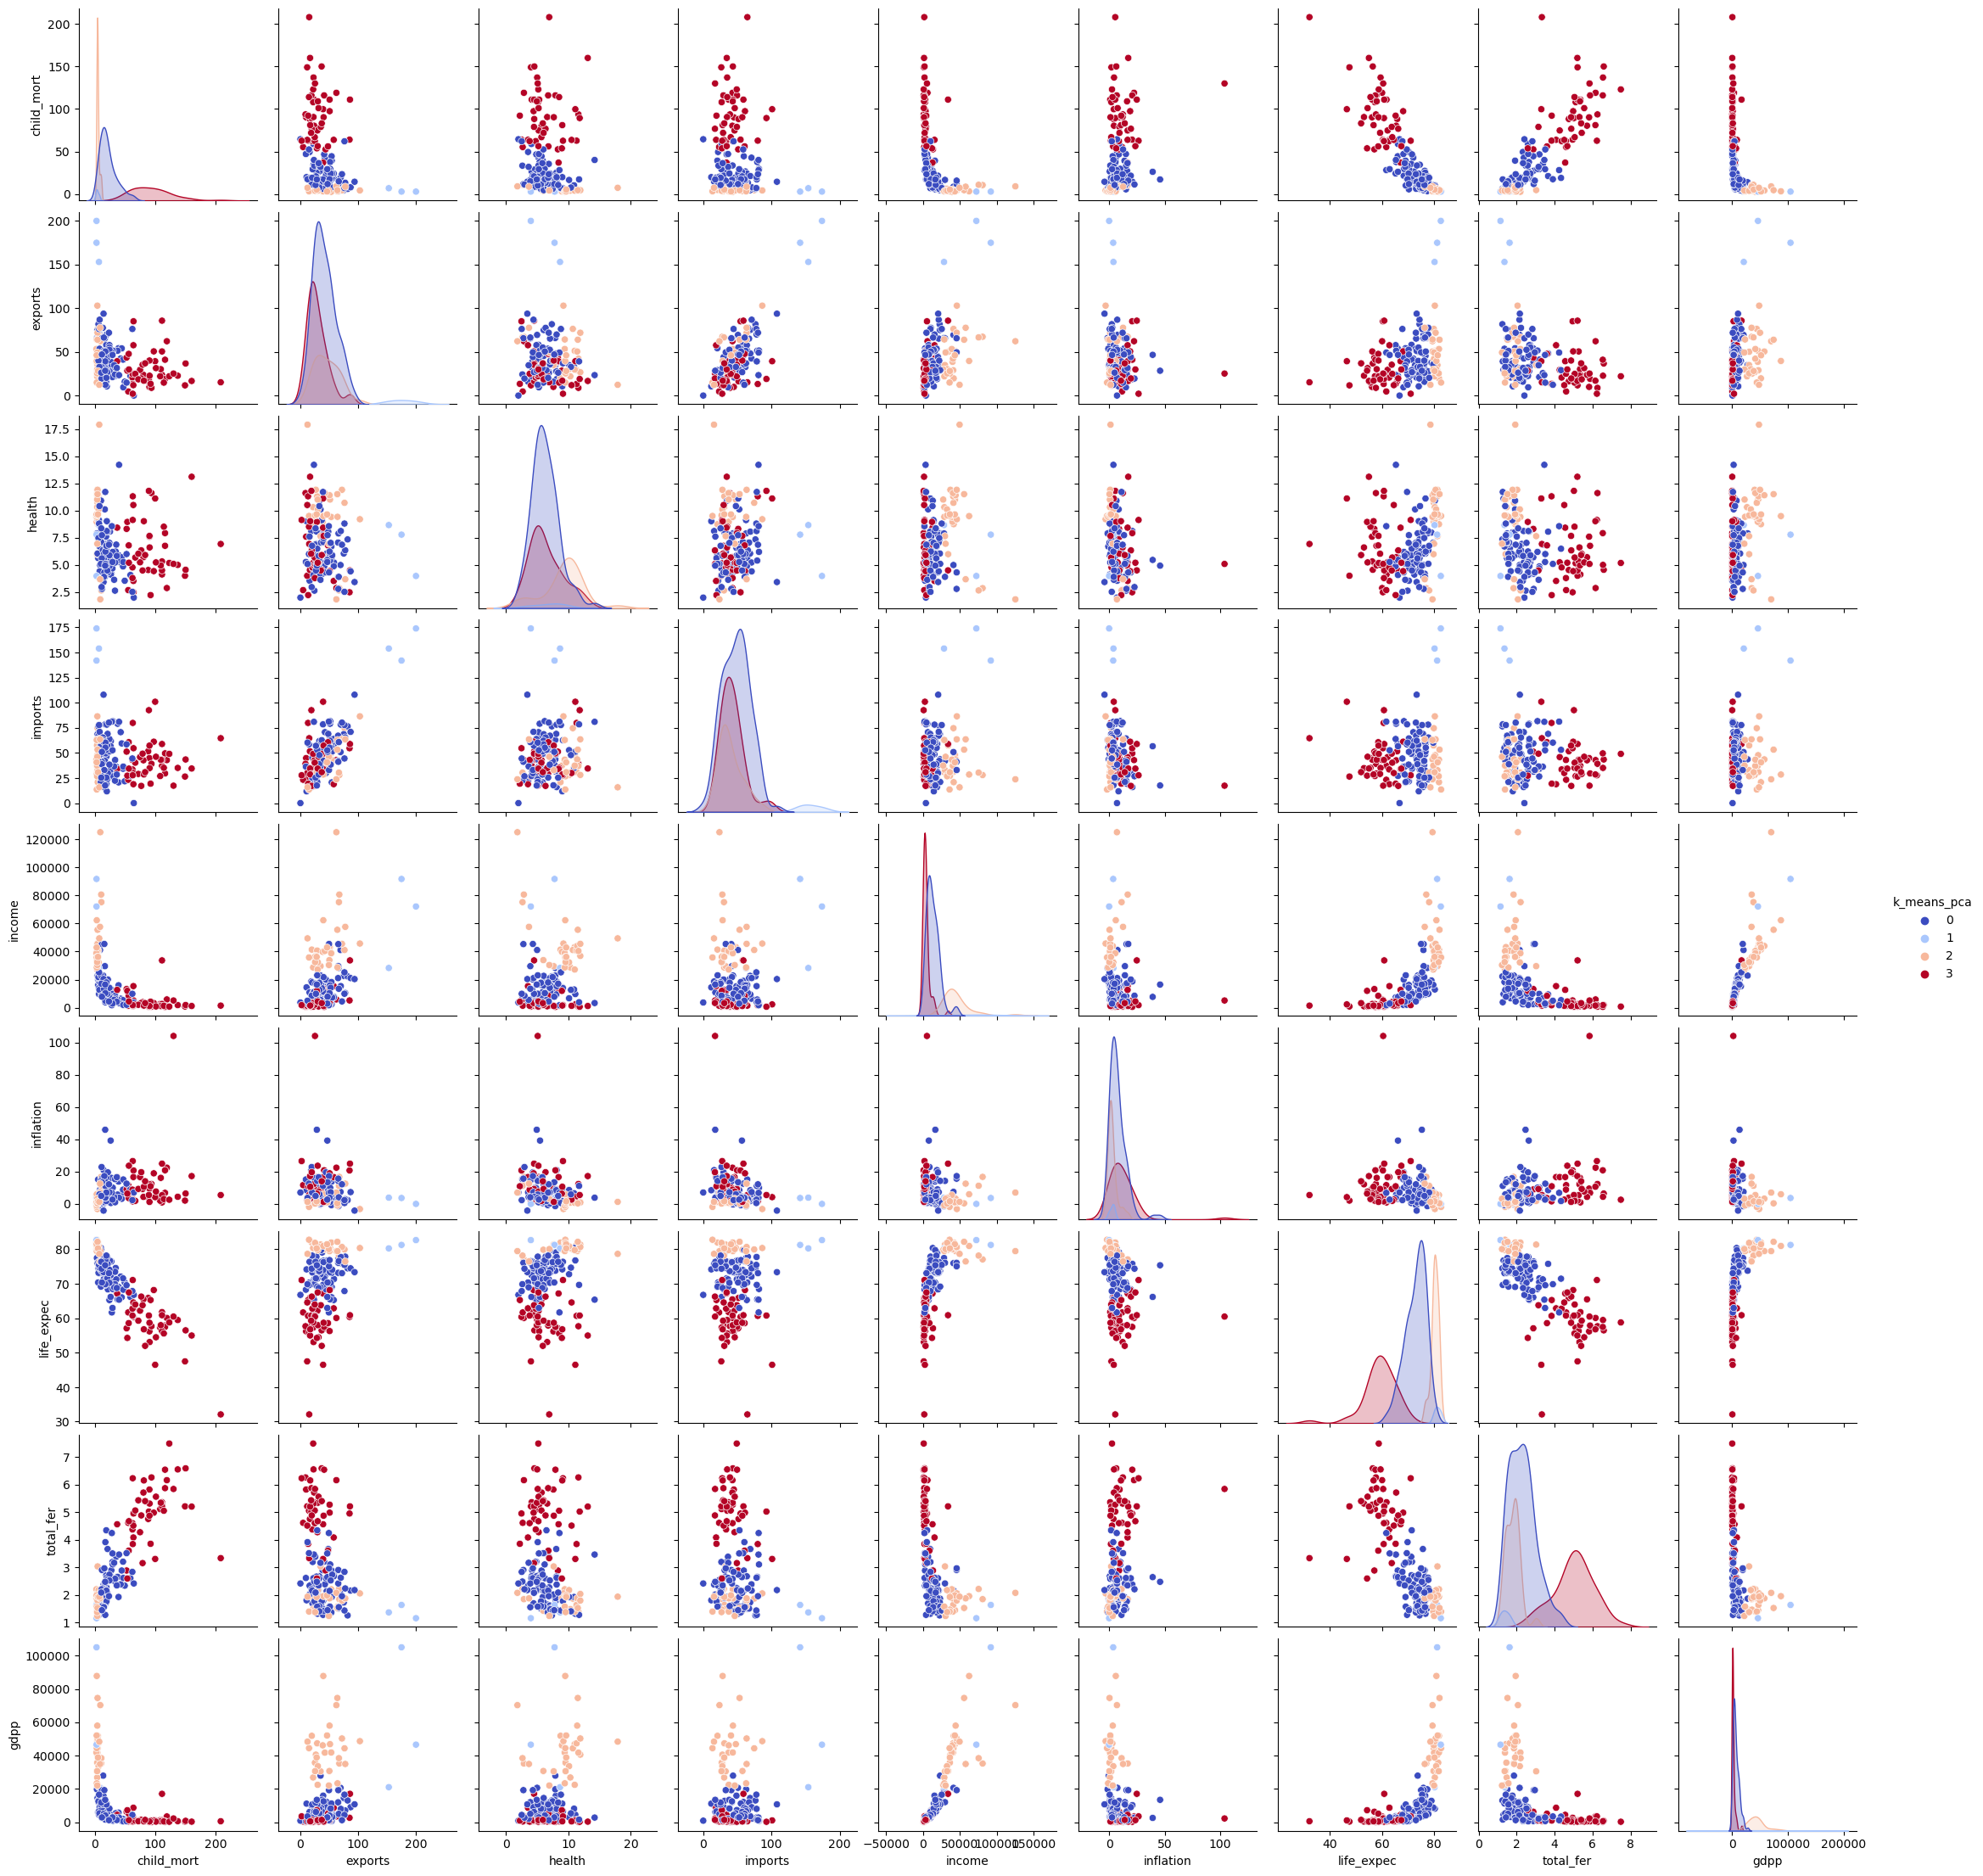

In [51]:
sns.pairplot(data = df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']], hue='k_means_pca', palette='coolwarm')

In [52]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3,4,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,3,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3,4,1,0,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,3,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,3,0,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,3,4,1,0,0,0


seleccionamos una variable para trabajar, en este caso la mortalidad infantil y el gdpp:

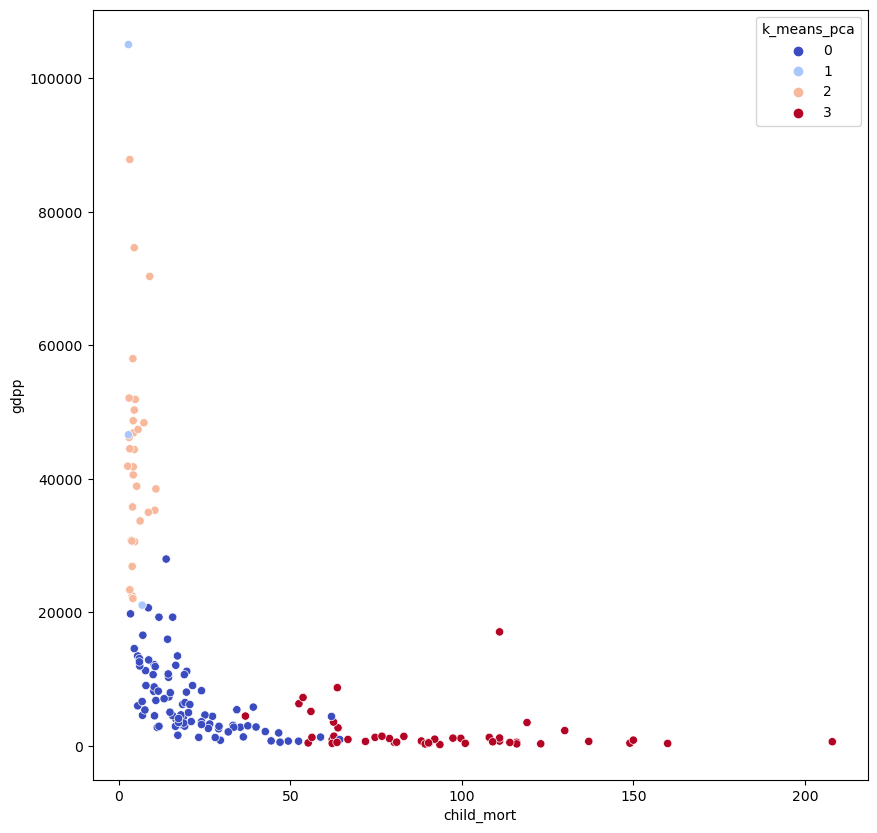

In [53]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_country, x='child_mort', y='gdpp',hue='k_means_pca', palette='coolwarm')
plt.show()

para la variable kmeans pca 3 observamos qué países aparecen. 

In [ ]:
df_country[df_country['k_means_pca']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3,1,0,1,0,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3,1,0,1,0,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,3,1,0,1,0,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,3,1,0,1,-1,-1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,3,1,0,1,0,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,3,1,0,0,0,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,3,1,0,1,0,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,3,1,0,1,0,0
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,3,1,0,1,0,0
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,3,1,0,1,0,0


Los resultados de cluster 3 son los países que tienen una mejor ecnomía. Esto indica que nuestro cluster funciona bien. Hay que tener conocimiento del data set para saber cuál es el objeto de estudio. 